In [103]:
!pip install quandl
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import json

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns

from bs4 import BeautifulSoup
import os
import codecs
from scipy import stats

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:

#made some changes

In [8]:
result['dataset'].keys()

dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])

In [53]:
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product, Quarterly
# Units: Percent of GDP, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

debt = quandl.get("FRED/GFDEGDQ188S", authtoken="ckJvd5G2a2dkK9nun3xS")

In [54]:
debt.columns

Index(['Value'], dtype='object')

In [5]:
# S&P 500 Index Composite, Monthly
# Units: Index
# Source: Yale University, Online Data Robert Shiller

sp500 = quandl.get("YALE/SPCOMP", authtoken="ckJvd5G2a2dkK9nun3xS")

In [6]:
# Unemployment Rate, Monthly
# Units: Percent, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

u = quandl.get("FRED/M0892AUSM156SNBR", authtoken="ckJvd5G2a2dkK9nun3xS")

In [7]:
# Balance on Current Account, NIPA's, Quarterly
# Units: Billions of Dollars Seasonally Adjusted Annual Rate
# Source: FRED (Federal Reserve Bank St. Louis)

balance = quandl.get("FRED/NETFI", authtoken="ckJvd5G2a2dkK9nun3xS")

In [8]:
sp = sp500.iloc[:,:1]

In [9]:
# Adding a new column with t-1 (lag) values to calculate monthly returns on S&P
sp['lag'] = sp['S&P Composite'].shift(1)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
#debt['lag'] = debt['Value'].shift(1)

In [10]:
# Get the date in a new column to be able to merge tables on Date
sp['Date'] = sp.index

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# As there is no lagged S&P for the first date we delete the first row 

to_drop = sp.iloc[:1]
sp.drop(to_drop.index, axis=0, inplace=True)

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
# The S&P monthly returns is simply the rate of change between months ((t - t-1)/t-1)*100

sp['monthly_return_per'] = ((sp['S&P Composite']-sp['lag'])/sp['lag'])*100

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
sp.head()

,S&P Composite,lag,Date,monthly_return_per
Year,,,,
1871-02-28,4.50,4.44,1871-02-28,1.351351
1871-03-31,4.61,4.50,1871-03-31,2.444444
1871-04-30,4.74,4.61,1871-04-30,2.819957
1871-05-31,4.86,4.74,1871-05-31,2.531646
1871-06-30,4.82,4.86,1871-06-30,-0.823045


In [ ]:
#u = unemployment
#sp500
#debt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104a73438>]],
      dtype=object)

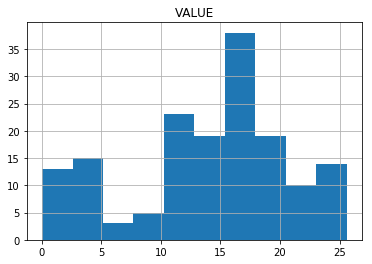

In [16]:
#graphical representation of unemployment rate in histogram
u.hist()

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


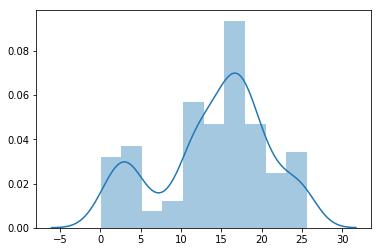

In [21]:
sns.distplot(u , density=True)

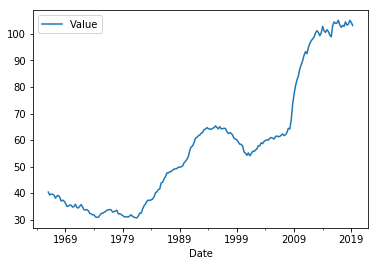

In [22]:
debt.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ae33128>]],
      dtype=object)

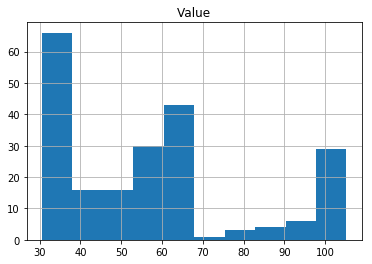

In [23]:
debt.hist()

In [19]:
#too long cleaning this data. 
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')

#i have done the below to make it much easy to loop

In [9]:
dftest = pd.read_csv('output_List_of_presidents_of_the_United_States_t0.tsv', sep='\t')

In [12]:
dftest.head(10)

,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2),Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).1,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).2,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).3,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).4,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).5,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).6,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).7,Unaffiliated (2) Federalist (1) Democratic-Republican (4) Democratic (15) Whig (4) Republican (19) National Union (2).8
0,Presidency[a],Presidency[a],President,President,Prior office[b],Party[c],Party[c],Election,Vice President
1,1,"April 30, 1789[d]–March 4, 1797",NaN,George Washington1732–1799(Lived: 67 years)[3]...,Commander-in-Chiefof theContinental Army(1775–...,,Unaffiliated[2],1788–89,John Adams[e][f]
2,1,"April 30, 1789[d]–March 4, 1797",NaN,George Washington1732–1799(Lived: 67 years)[3]...,Commander-in-Chiefof theContinental Army(1775–...,,Unaffiliated[2],1792,John Adams[e][f]
3,2,"March 4, 1797–March 4, 1801",NaN,John Adams1735–1826(Lived: 90 years)[6][7][8],1stvice president of the United States(1789–1797),NaN,Federalist,1796,Thomas Jefferson[g]
4,3,"March 4, 1801–March 4, 1809",NaN,Thomas Jefferson1743–1826(Lived: 83 years)[9][...,2ndvice president of the United States(1797–1801),NaN,Democratic-Republican,1800,"Aaron BurrMarch 4, 1801 – March 4, 1805"
5,3,"March 4, 1801–March 4, 1809",NaN,Thomas Jefferson1743–1826(Lived: 83 years)[9][...,2ndvice president of the United States(1797–1801),NaN,Democratic-Republican,1804,"George ClintonMarch 4, 1805 – March 4, 1809"
6,4,"March 4, 1809–March 4, 1817",NaN,James Madison1751–1836(Lived: 85 years)[12][13...,5thUnited States secretary of state(1801–1809),NaN,Democratic-Republican,1808,"George ClintonMarch 4, 1809 – April 20, 1812(D..."
7,4,"March 4, 1809–March 4, 1817",NaN,James Madison1751–1836(Lived: 85 years)[12][13...,5thUnited States secretary of state(1801–1809),NaN,Democratic-Republican,1808,Office vacant(Balance of Clinton's term)
8,4,"March 4, 1809–March 4, 1817",NaN,James Madison1751–1836(Lived: 85 years)[12][13...,5thUnited States secretary of state(1801–1809),NaN,Democratic-Republican,1812,"Elbridge GerryMarch 4, 1813 – November 23, 181..."
9,4,"March 4, 1809–March 4, 1817",NaN,James Madison1751–1836(Lived: 85 years)[12][13...,5thUnited States secretary of state(1801–1809),NaN,Democratic-Republican,1812,Office vacant(Balance of Gerry's term)


In [ ]:
#next step is to drop all duplicates and clean data

In [70]:
df1 = pd.read_csv('us_presidents.csv')
df1

,Unnamed: 0,Unnamed: 0.1,S.No.,start,end,president,prior,party,vice,Unnamed: 9,Unnamed: 10
0,0,0,1,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,NaN,#VALUE!
1,1,1,2,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,NaN,NaN
2,2,2,3,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,NaN,NaN
3,3,3,4,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,NaN,NaN
4,4,4,5,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,NaN,NaN
5,5,5,6,1825-03-04,1829-03-04,John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,NaN,NaN
6,6,6,7,1829-03-04,1837-03-04,Andrew Jackson,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun,NaN,NaN
7,7,7,8,1837-03-04,1841-03-04,Martin Van Buren,8th Vice President of the United States,Democratic,Richard Mentor Johnson,NaN,NaN
8,8,8,9,1841-03-04,1841-04-04,William Henry Harrison,United States Minister to Colombia (1828–1829),Whig,John Tyler,NaN,NaN
9,9,9,10,1841-04-04,1845-03-04,John Tyler,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,NaN,NaN


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
Unnamed: 0    45 non-null int64
S.No.         45 non-null int64
start         45 non-null object
end           45 non-null object
president     45 non-null object
prior         45 non-null object
party         45 non-null object
vice          45 non-null object
dtypes: int64(2), object(6)
memory usage: 2.9+ KB


In [35]:
df1['start'] = pd.to_datetime(df1['start'])
df1['end'] = pd.to_datetime(df1['end'])

In [37]:
df1.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [38]:
df1.to_csv(r"us_presidents.csv")

In [68]:
df1['days'] = df1['end'] - df1['start']


In [67]:
df1 = df1.drop('days', axis=1)
df1 = df1.drop('months', axis=1)

In [70]:
#getting the number of months each president spent in office.
df1['months'] = df1.days // np.timedelta64(1, 'M')

In [71]:
df1.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice,days,months
0,0,1,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,2865 days,94
1,1,2,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,1460 days,47
2,2,3,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,2922 days,96
3,3,4,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,2922 days,96
4,4,5,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,2922 days,96


In [72]:
df1.head(20)

,Unnamed: 0,S.No.,start,end,president,prior,party,vice,days,months
0,0,1,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,2865 days,94
1,1,2,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,1460 days,47
2,2,3,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,2922 days,96
3,3,4,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,2922 days,96
4,4,5,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,2922 days,96
5,5,6,1825-03-04,1829-03-04,John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun,1461 days,48
6,6,7,1829-03-04,1837-03-04,Andrew Jackson,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun,2922 days,96
7,7,8,1837-03-04,1841-03-04,Martin Van Buren,8th Vice President of the United States,Democratic,Richard Mentor Johnson,1461 days,48
8,8,9,1841-03-04,1841-04-04,William Henry Harrison,United States Minister to Colombia (1828–1829),Whig,John Tyler,31 days,1
9,9,10,1841-04-04,1845-03-04,John Tyler,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant,1430 days,46


In [139]:
sp.head()

,S&P Composite,lag,Date,monthly_return_per
Year,,,,
1871-03-31,4.61,4.50,1871-03-31,2.444444
1871-04-30,4.74,4.61,1871-04-30,2.819957
1871-05-31,4.86,4.74,1871-05-31,2.531646
1871-06-30,4.82,4.86,1871-06-30,-0.823045
1871-07-31,4.73,4.82,1871-07-31,-1.867220


In [24]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-02-28 to 2019-08-31
Data columns (total 4 columns):
S&P Composite         1783 non-null float64
lag                   1783 non-null float64
Date                  1783 non-null datetime64[ns]
monthly_return_per    1783 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 69.6 KB


In [27]:
df1.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,1789-04-30,"March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,1797-03-04,"March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,1801-03-04,"March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,1809-03-04,"March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,1817-03-04,"March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [142]:
df1.tail()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice,days,months
40,40,41,1989-01-20,1993-01-20,George H. W. Bush,43rd Vice President of the United States,Republican,Dan Quayle,1461 days,48
41,41,42,1993-01-20,2001-01-20,Bill Clinton,40th & 42nd Governor of Arkansas (1979–1981...,Democratic,Al Gore,2922 days,96
42,42,43,2001-01-20,2009-01-20,George W. Bush,46th Governor of Texas ( 1995–2000 ),Republican,Dick Cheney,2922 days,96
43,43,44,2009-01-20,2017-01-20,Barack Obama,U.S. Senator ( Class 3 ) from Illinois ...,Democratic,Joe Biden,2922 days,96
44,44,45,2017-01-20,2019-11-10,Donald Trump,Chairman of The Trump Organization ( 1971–...,Republican,Mike Pence,1024 days,33


In [ ]:
df1.

In [126]:
barack_start = df1.loc[df1.president == 'Barack Obama','start':'end']['start']

In [127]:
barack_start

43   2009-01-20
Name: start, dtype: datetime64[ns]

In [128]:
barack_end = df1.loc[df1.president == 'Barack Obama','start':'end']['end']

In [129]:
barack_end

43   2017-01-20
Name: end, dtype: datetime64[ns]

In [ ]:
debt[debt['Date'] > '2017-01-01' && debt['Date'] < '2019-04-01']

# DEBT

In [88]:
debt.columns

Index(['Value', 'lag'], dtype='object')

 Adding a new column with t-1 (lag) values to calculate monthly returns on Debt

In [91]:
debt['lag'] = debt['Value'].shift(1)
debt.head()

,Value,lag
Date,,
1966-01-01,40.33999,NaN
1966-04-01,39.26763,40.33999
1966-07-01,39.62091,39.26763
1966-10-01,39.51977,39.62091
1967-01-01,39.20383,39.51977


In [59]:
# Get the date in a new column to be able to merge tables on Date
debt['Date'] = debt.index

debt['lag'] = debt.Value.shift(1)

In [60]:
# As there is no lagged Debt for the first date we delete the first row 

to_drop = debt.iloc[:1]
debt.drop(to_drop.index, axis=0, inplace=True)

In [61]:
# The  monthly Debt returns is simply the rate of change between months ((t - t-1)/t-1)*100

debt['diff'] = (debt['Value']-debt['lag'])

In [63]:
debt

,Value,Date,lag,diff
Date,,,,
1966-07-01,39.62091,1966-07-01,39.26763,0.35328
1966-10-01,39.51977,1966-10-01,39.62091,-0.10114
1967-01-01,39.20383,1967-01-01,39.51977,-0.31594
1967-04-01,38.03292,1967-04-01,39.20383,-1.17091
1967-07-01,38.82145,1967-07-01,38.03292,0.78853
1967-10-01,39.10231,1967-10-01,38.82145,0.28086
1968-01-01,38.42951,1968-01-01,39.10231,-0.67280
1968-04-01,36.96379,1968-04-01,38.42951,-1.46572
1968-07-01,37.30897,1968-07-01,36.96379,0.34518


In [160]:
debt.Value.mean()

57.458717183098585

In [161]:
debt.monthly_return_per.mean()

0.295120234741784

In [144]:
debt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 1966-04-01 to 2019-04-01
Data columns (total 4 columns):
Value                 213 non-null float64
lag                   213 non-null float64
Date                  213 non-null datetime64[ns]
monthly_return_per    213 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 18.3 KB


In [99]:
presidents1 = pd.read_csv('clean_sp.csv')
presidents1.head()

,Unnamed: 0,Date,monthly_return_per,president
0,0,1871-02-28,1.351351,Ulysses S. Grant
1,1,1871-03-31,2.444444,Ulysses S. Grant
2,2,1871-04-30,2.819957,Ulysses S. Grant
3,3,1871-05-31,2.531646,Ulysses S. Grant
4,4,1871-06-30,-0.823045,Ulysses S. Grant


In [100]:
presidents1.tail()

,Unnamed: 0,Date,monthly_return_per,president
1778,1778,2019-04-30,3.559940,Donald Trump
1779,1779,2019-05-31,-1.690543,Donald Trump
1780,1780,2019-06-30,1.242158,Donald Trump
1781,1781,2019-07-31,3.665528,Donald Trump
1782,1782,2019-08-31,-3.742519,Donald Trump


In [ ]:
#presidents1['month'] = presidents1['Date'].dt.month
#presidents1['year'] = presidents['Date'].dt.year
#presidents1['monthyear'] = presidents

In [64]:
#debt['Date'] = debt.index

In [77]:
#debt['month'] = debt['Date'].dt.month
#debt['year'] = debt['Date'].dt.year
#debt['monthyear'] = debt['year'].map(str) + '/' + debt['month'].map(str)

In [ ]:
#merging debt with presidents
#debt_df1 = debt_df.merge(presidents , on = 'monthyear' , how = 'left')
#debt_p = debt_df[['Date','Value','diff','president']]
#debt_p['president'] = debt_p['president'].fillna(method = 'backfill')
#debt_p.president.fillna('Donald Trump', inplace = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23db8668>,
      dtype=object)

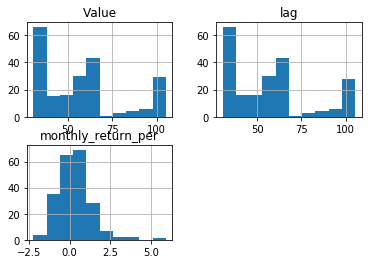

In [162]:
debt.hist()

#In 2009, more money was pumped into the economy after the financial
 crisis in 2008

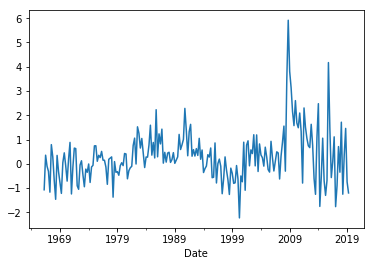

In [163]:
debt['monthly_return_per'].plot()

# We can see here that the graph is Normally distributed.

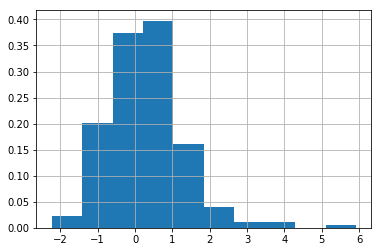

In [164]:
debt['monthly_return_per'].hist(density=True)

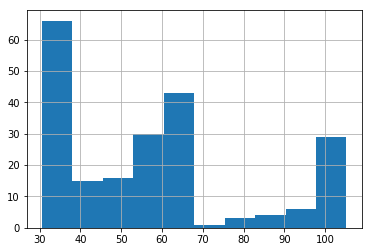

In [165]:
#Debt value doesnt have a normal distribution
debt['Value'].hist()

T-Test of Debt
Welches T-Test

In [166]:
debt.describe()

,Value,lag,monthly_return_per
count,213.000000,213.000000,213.000000
mean,57.458717,57.163597,0.295120
std,23.450910,23.267371,1.045774
min,30.603330,30.603330,-2.232300
25%,35.632370,35.632370,-0.323650
50%,56.036130,55.753050,0.250300
75%,64.307090,64.254690,0.768900
max,105.186130,105.186130,5.916010


#Trump's Start Date AS President

In [140]:
df1.loc[df1.president == 'Donald Trump','start':'end']['start']

44   2017-01-20
Name: start, dtype: datetime64[ns]

In [ ]:
# change debt into a datatime object

In [111]:
debt.groupby

<bound method NDFrame.groupby of                 Value       Date        lag     diff  month  year month_year  \
Date                                                                           
1966-07-01   39.62091 1966-07-01   39.26763  0.35328      7  1966     1966/7   
1966-10-01   39.51977 1966-10-01   39.62091 -0.10114     10  1966    1966/10   
1967-01-01   39.20383 1967-01-01   39.51977 -0.31594      1  1967     1967/1   
1967-04-01   38.03292 1967-04-01   39.20383 -1.17091      4  1967     1967/4   
1967-07-01   38.82145 1967-07-01   38.03292  0.78853      7  1967     1967/7   
1967-10-01   39.10231 1967-10-01   38.82145  0.28086     10  1967    1967/10   
1968-01-01   38.42951 1968-01-01   39.10231 -0.67280      1  1968     1968/1   
1968-04-01   36.96379 1968-04-01   38.42951 -1.46572      4  1968     1968/4   
1968-07-01   37.30897 1968-07-01   36.96379  0.34518      7  1968     1968/7   
1968-10-01   36.98532 1968-10-01   37.30897 -0.32365     10  1968    1968/10   
1969-01

In [168]:
debt.head()

,Value,lag,Date,monthly_return_per
Date,,,,
1966-04-01,39.26763,40.33999,1966-04-01,-1.07236
1966-07-01,39.62091,39.26763,1966-07-01,0.35328
1966-10-01,39.51977,39.62091,1966-10-01,-0.10114
1967-01-01,39.20383,39.51977,1967-01-01,-0.31594
1967-04-01,38.03292,39.20383,1967-04-01,-1.17091


In [ ]:
#dont run this yet . error waiting
df1[df1['start'] > '2017-01-01' & df1['end'] < '2019-04-01']

In [174]:
debt.index

DatetimeIndex(['1966-04-01', '1966-07-01', '1966-10-01', '1967-01-01',
               '1967-04-01', '1967-07-01', '1967-10-01', '1968-01-01',
               '1968-04-01', '1968-07-01',
               ...
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=213, freq=None)

In [183]:
type(debt)

pandas.core.frame.DataFrame

In [186]:
type(debt['Date'])

pandas.core.series.Series

In [ ]:
presidents.info()

In [ ]:
presidents.loc[presidents.president == 'Donald Trump','start':'end']['start']

In [6]:
presido = pd.read_csv('clean_sp.csv')
presido.head()

,Unnamed: 0,Date,monthly_return_per,president
0,0,1871-02-28,1.351351,Ulysses S. Grant
1,1,1871-03-31,2.444444,Ulysses S. Grant
2,2,1871-04-30,2.819957,Ulysses S. Grant
3,3,1871-05-31,2.531646,Ulysses S. Grant
4,4,1871-06-30,-0.823045,Ulysses S. Grant


In [8]:
presido.tail()

,Unnamed: 0,Date,monthly_return_per,president
1778,1778,2019-04-30,3.559940,Donald Trump
1779,1779,2019-05-31,-1.690543,Donald Trump
1780,1780,2019-06-30,1.242158,Donald Trump
1781,1781,2019-07-31,3.665528,Donald Trump
1782,1782,2019-08-31,-3.742519,Donald Trump


In [13]:
presido.loc[presido.president == 'Donald Trump', 'Date']

1752    2017-02-28
1753    2017-03-31
1754    2017-04-30
1755    2017-05-31
1756    2017-06-30
1757    2017-07-31
1758    2017-08-31
1759    2017-09-30
1760    2017-10-31
1761    2017-11-30
1762    2017-12-31
1763    2018-01-31
1764    2018-02-28
1765    2018-03-31
1766    2018-04-30
1767    2018-05-31
1768    2018-06-30
1769    2018-07-31
1770    2018-08-31
1771    2018-09-30
1772    2018-10-31
1773    2018-11-30
1774    2018-12-31
1775    2019-01-31
1776    2019-02-28
1777    2019-03-31
1778    2019-04-30
1779    2019-05-31
1780    2019-06-30
1781    2019-07-31
1782    2019-08-31
Name: Date, dtype: object

In [ ]:
# creating a new table for Trump using Boolean

In [18]:
presido['Trump'] = 0

In [21]:
presido[presido.president == 'Donald Trump'] = presido[presido.president == 'Donald Trump'].assign(Trump = 1)

In [22]:
presido

,Unnamed: 0,Date,monthly_return_per,president,Trump
0,0,1871-02-28,1.351351,Ulysses S. Grant,0
1,1,1871-03-31,2.444444,Ulysses S. Grant,0
2,2,1871-04-30,2.819957,Ulysses S. Grant,0
3,3,1871-05-31,2.531646,Ulysses S. Grant,0
4,4,1871-06-30,-0.823045,Ulysses S. Grant,0
5,5,1871-07-31,-1.867220,Ulysses S. Grant,0
6,6,1871-08-31,1.268499,Ulysses S. Grant,0
7,7,1871-09-30,1.043841,Ulysses S. Grant,0
8,8,1871-10-31,-5.165289,Ulysses S. Grant,0
9,9,1871-11-30,1.089325,Ulysses S. Grant,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18aa25f8>,
      dtype=object)

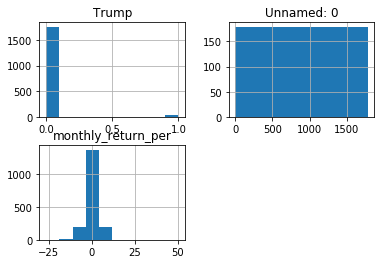

In [25]:
presido.hist()

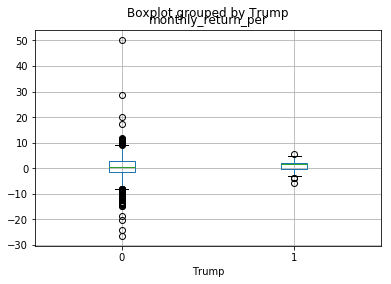

In [30]:
presido.boxplot(column =['monthly_return_per'], by = 'Trump')

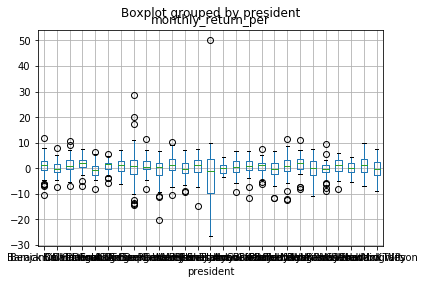

In [107]:
presido.boxplot(column = ['monthly_return_per'] , by= 'president')

# T-Test StatsModel for SP500

In [45]:
group1 = presido[presido.Trump == 1]
group2 = presido[presido.Trump == 0]

In [49]:
import warnings;
warnings.simplefilter('ignore')
import statsmodels.api as sm

from statsmodels.stats.weightstats import ttest_ind

t-test

In [50]:
ttest_ind(group1['monthly_return_per'], group2['monthly_return_per'], alternative = 'two-sided', value=0)

(0.4917181593188423, 0.6229791942984343, 1781.0)

#Welch T-test

In [105]:
stats.ttest_ind(group1['monthly_return_per'], group2['monthly_return_per'], equal_var= False)

Ttest_indResult(statistic=0.7621291533451218, pvalue=0.4514453748706787)

In [ ]:
#stats.norm(ttest)